In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dd.dd import Analysis_DD
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:


HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)
pathTT_3BFF = HOME_DIR + 'content/trained_models/task-trained/tt_3bff/'
pathTT_MT = HOME_DIR + 'content/trained_models/task-trained/tt_MultiTask/'
pathTT_RT = HOME_DIR + 'content/trained_models/task-trained/tt_RandomTarget/'

an_TT_3BFF = Analysis_TT(run_name = "TT_3BFF", filepath = pathTT_3BFF)
an_TT_MT = Analysis_TT(run_name = "TT_MT", filepath = pathTT_MT)
an_TT_RT = Analysis_TT(run_name = "TT_RT", filepath = pathTT_RT)

path_GRU_Sweep_3BFF = pathTT_3BFF + "20250211_3BFF_GRU_Viz/"
subfolders_GRU_3BFF = [f.path for f in os.scandir(path_GRU_Sweep_3BFF) if f.is_dir()]

path_LFADS_Sweep_3BFF = pathTT_3BFF + "20250130_NBFF_LFADS_Viz/"
subfolders_LFADS_3BFF = [f.path for f in os.scandir(path_LFADS_Sweep_3BFF) if f.is_dir()]

path_LDS_Sweep_3BFF = pathTT_3BFF + "20250130_NBFF_LDS_Viz/"
subfolders_LDS_3BFF = [f.path for f in os.scandir(path_LDS_Sweep_3BFF) if f.is_dir()]

path_GRU_Sweep_MT = pathTT_MT + "20250211_MT_GRU_RNN_Viz/"
subfolders_GRU_MT = [f.path for f in os.scandir(path_GRU_Sweep_MT) if f.is_dir()]

path_LFADS_Sweep_MT = pathTT_MT + "20250130_MultiTask_LFADS_Viz/"
subfolders_LFADS_MT = [f.path for f in os.scandir(path_LFADS_Sweep_MT) if f.is_dir()]

path_LDS_Sweep_MT = pathTT_MT + "20250131_MultiTask_LDS_Viz/"
subfolders_LDS_MT = [f.path for f in os.scandir(path_LDS_Sweep_MT) if f.is_dir()]

path_GRU_Sweep_RT = pathTT_RT + "20250211_RT_GRU_Viz/"
subfolders_GRU_RT = [f.path for f in os.scandir(path_GRU_Sweep_RT) if f.is_dir()]

path_LFADS_Sweep_RT = pathTT_RT + "20250130_RandomTarget_LFADS_Viz/"
subfolders_LFADS_RT = [f.path for f in os.scandir(path_LFADS_Sweep_RT) if f.is_dir()]

path_LDS_Sweep_RT = pathTT_RT + "20250130_RandomTarget_LDS_Viz/"
subfolders_LDS_RT = [f.path for f in os.scandir(path_LDS_Sweep_RT) if f.is_dir()]




/home/csverst/Github/CtDBenchmark/


In [3]:
comparison_3BFF = Comparison(comparison_tag="3BFF")
comparison_3BFF.load_analysis(an_TT_3BFF, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU_3BFF:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DD.create(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison_3BFF.load_analysis(analysis_GRU, group = "GRU")

for subfolder in subfolders_LFADS_3BFF:
    subfolder = subfolder + "/"
    analysis_LFADS = Analysis_DD.create(run_name = "LFADS", filepath = subfolder, model_type = "LFADS")
    comparison_3BFF.load_analysis(analysis_LFADS, group = "LFADS")

for subfolder in subfolders_LDS_3BFF:
    subfolder = subfolder + "/"
    analysis_LDS = Analysis_DD.create(run_name = "LDS", filepath = subfolder, model_type = "SAE")
    comparison_3BFF.load_analysis(analysis_LDS, group = "LDS")

comparison_3BFF.regroup()
# comparison_3BFF.plot_trials(num_trials=2)

In [4]:
comparison_NBFF_single = Comparison(comparison_tag="NBFF_single")
comparison_NBFF_single.load_analysis(an_TT_3BFF, reference_analysis=True, group = "TT")
comparison_NBFF_single.load_analysis(analysis_LFADS, group = "LFADS")
comparison_NBFF_single.load_analysis(analysis_GRU, group = "GRU")
comparison_NBFF_single.load_analysis(analysis_LDS, group = "LDS")

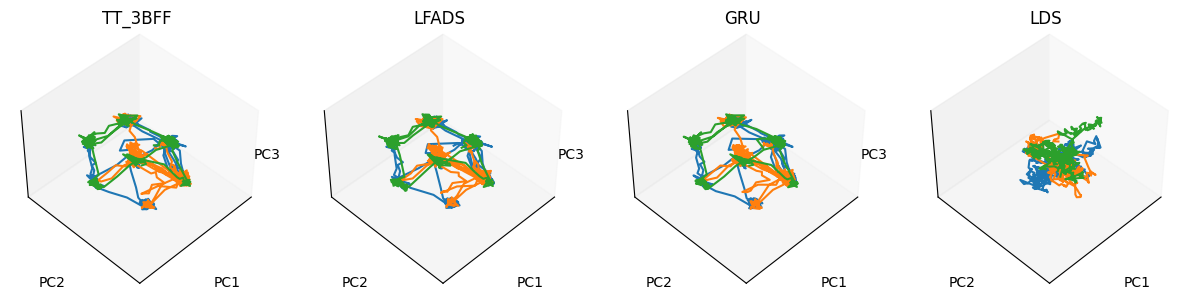

In [5]:

fig = comparison_NBFF_single.plot_trials_3d_reference(num_trials=3, savePDF=True, angle = [45, 45])

In [6]:
fig.show()
plt.savefig("temp.pdf")

/tmp/ipykernel_4148203/3598058904.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

In [7]:
comparison_MT = Comparison(comparison_tag="MultiTask")
comparison_MT.load_analysis(an_TT_MT, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU_MT:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DD.create(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison_MT.load_analysis(analysis_GRU, group = "GRU")

for subfolder in subfolders_LFADS_MT:
    subfolder = subfolder + "/"
    analysis_LFADS = Analysis_DD.create(run_name = "LFADS", filepath = subfolder, model_type = "LFADS")
    comparison_MT.load_analysis(analysis_LFADS, group = "LFADS")

for subfolder in subfolders_LDS_MT:
    subfolder = subfolder + "/"
    analysis_LDS = Analysis_DD.create(run_name = "LDS", filepath = subfolder, model_type = "SAE")
    comparison_MT.load_analysis(analysis_LDS, group = "LDS")
    
comparison_MT.regroup()

In [8]:
pred_fr_LDS = analysis_LDS.get_rates(phase ='val').detach().cpu().numpy()
true_fr = analysis_LDS.get_true_rates(phase = 'val').detach().cpu().numpy()
trial_lens= analysis_LDS.get_trial_lens(phase= "val").detach().cpu().numpy()
pred_fr_LFADS = analysis_LFADS.get_rates(phase ='val').detach().cpu().numpy()
pred_fr_GRU = analysis_GRU.get_rates(phase='val').detach().cpu().numpy()



In [9]:
print(pred_fr_LDS.shape)
print(true_fr.shape)
print(trial_lens)
pred_fr_list_LDS = []
true_fr_list = []
pred_fr_list_LFADS = []
pred_fr_list_GRU = []

for i in range(len(trial_lens)):
    pred_fr_list_LDS.append(pred_fr_LDS[i,:int(trial_lens[i]),:])
    true_fr_list.append(true_fr[i,:int(trial_lens[i]),:])
    pred_fr_list_GRU.append(pred_fr_GRU[i,:int(trial_lens[i]),:])
    pred_fr_list_LFADS.append(pred_fr_LFADS[i,:int(trial_lens[i]),:])


(1500, 320, 60)
(1500, 320, 60)
[167. 224. 194. ... 129. 126. 114.]


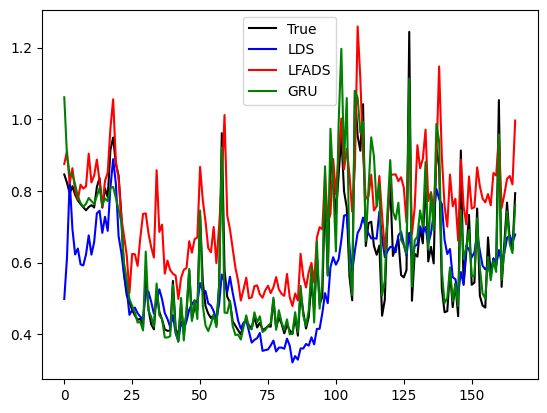

In [10]:

trial_num=0
neuron_num =4
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(true_fr_list[trial_num][:,neuron_num], color = 'k', label = 'True')
ax.plot(pred_fr_list_LDS[trial_num][:,neuron_num], color = 'b', label = 'LDS')
ax.plot(pred_fr_list_LFADS[trial_num][:,neuron_num], color = "r", label = "LFADS")
ax.plot(pred_fr_list_GRU[trial_num][:,neuron_num], color = "g", label = "GRU")
ax.legend()


In [11]:
comparison_MT_single = Comparison(comparison_tag="MT_single")
comparison_MT_single.load_analysis(an_TT_MT, reference_analysis=True, group = "TT")
comparison_MT_single.load_analysis(analysis_LFADS, group = "LFADS")
comparison_MT_single.load_analysis(analysis_GRU, group = "GRU")
comparison_MT_single.load_analysis(analysis_LDS, group = "LDS")


In [12]:
# comparison_temp.compare_rate_state_r2()
trial_lens= analysis_LFADS.get_trial_lens(phase= "val")
lats_true = an_TT_MT.get_latents(phase= "val")
extra = an_TT_MT.get_extra_inputs(phase= "val")
noiseless_inputs = an_TT_MT.get_model_inputs_noiseless(phase= "val")
lats_lfads = analysis_LFADS.get_latents(phase= "val")
lats_gru = analysis_GRU.get_latents(phase ="val")
lats_lds = analysis_LDS.get_latents(phase = "val")

lats_true_s =[]
lats_lfads_s = []
lats_gru_s = []
lats_lds_s = []

for i in range(len(trial_lens)):
    lats_true_s.append(lats_true[i][:int(trial_lens[i])].detach().numpy())
    lats_lfads_s.append(lats_lfads[i][:int(trial_lens[i])].detach().numpy())
    lats_gru_s.append(lats_gru[i][:int(trial_lens[i])].detach().numpy())
    lats_lds_s.append(lats_lds[i][:int(trial_lens[i])].detach().numpy())

lats_true_s = np.concatenate(lats_true_s, axis = 0)
lats_lfads_s = np.concatenate(lats_lfads_s, axis = 0)
lats_gru_s = np.concatenate(lats_gru_s, axis = 0)
lats_lds_s = np.concatenate(lats_lds_s, axis = 0)

    

In [13]:
print(lats_true.shape)

torch.Size([1500, 320, 128])


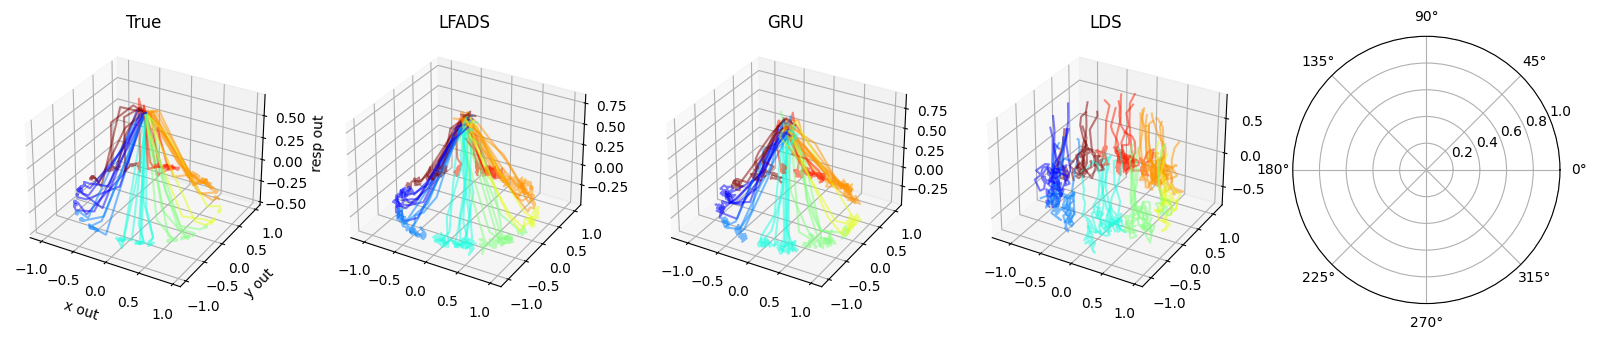

In [14]:
input_list = an_TT_MT.env.input_labels
memPro_ind = 6
use_pca= False
memPro_trials = []
for i in range(noiseless_inputs[1].shape[0]):
    if noiseless_inputs[1][i,0,memPro_ind] == 1:
        memPro_trials.append(i)

resp_start = extra[memPro_trials, 0].detach().numpy()
resp_end = extra[memPro_trials, 1].detach().numpy()
targets = an_TT_MT.get_model_inputs(phase = "val")[2]
memProTargs = np.zeros((len(memPro_trials), 2))
for i in range(len(memPro_trials)):
    memProTargs[i,:] = targets[memPro_trials[i], int(resp_end[i])-1, 1:]

memProAngs = np.arctan2(memProTargs[:,1], memProTargs[:,0])
memProBins = np.digitize(memProAngs, np.linspace(-np.pi, np.pi, 9))


lats_true_memPro = lats_true[memPro_trials]
lats_lfads_memPro = lats_lfads[memPro_trials]
lats_gru_memPro = lats_gru[memPro_trials]
lats_lds_memPro = lats_lds[memPro_trials]

lats_true_memPro_s =[]
lats_lfads_memPro_s = []
lats_gru_memPro_s = []
lats_lds_memPro_s = []
for i in range(lats_true_memPro.shape[0]):
    lats_true_memPro_s.append(lats_true_memPro[i][int(resp_start[i]):int(resp_end[i])].detach().numpy())
    lats_lfads_memPro_s.append(lats_lfads_memPro[i][int(resp_start[i]):int(resp_end[i])].detach().numpy())
    lats_gru_memPro_s.append(lats_gru_memPro[i][int(resp_start[i]):int(resp_end[i])].detach().numpy())
    lats_lds_memPro_s.append(lats_lds_memPro[i][int(resp_start[i]):int(resp_end[i])].detach().numpy())

lats_true_memPro_s1 = np.concatenate(lats_true_memPro_s, axis = 0)
lats_lfads_memPro_s1 = np.concatenate(lats_lfads_memPro_s, axis = 0)
lats_gru_memPro_s1 = np.concatenate(lats_gru_memPro_s, axis = 0)
lats_lds_memPro_s1 = np.concatenate(lats_lds_memPro_s, axis = 0)

readout = an_TT_MT.model.readout
wt = readout.weight.detach().numpy()
x_wt = wt[1,:]
y_wt = wt[2,:]
resp_wt = wt[0,:]

pca_memPro = PCA(n_components=3)
pca_memPro.fit(lats_true_memPro_s1)
lats_true_memPro_s1_pca = pca_memPro.transform(lats_true_memPro_s1)

x_proj = np.dot(lats_true_memPro_s1, x_wt)
y_proj = np.dot(lats_true_memPro_s1, y_wt)
resp_proj = np.dot(lats_true_memPro_s1, resp_wt)

lats_true_memPro_s1_wts = np.stack(( x_proj, y_proj, resp_proj), axis = 1)

lr_lfads = LinearRegression()
lr_gru = LinearRegression()
lr_lds = LinearRegression()

if use_pca:
    lr_lfads.fit(lats_lfads_memPro_s1, lats_true_memPro_s1_pca)
    lr_gru.fit(lats_gru_memPro_s1, lats_true_memPro_s1_pca)
    lr_lds.fit(lats_lds_memPro_s1, lats_true_memPro_s1_pca)
else:

    lr_lfads.fit(lats_lfads_memPro_s1, lats_true_memPro_s1_wts)
    lr_gru.fit(lats_gru_memPro_s1, lats_true_memPro_s1_wts)
    lr_lds.fit(lats_lds_memPro_s1, lats_true_memPro_s1_wts)
    
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(151, projection='3d')
ax2 = fig.add_subplot(152, projection='3d')
ax3 = fig.add_subplot(153, projection='3d')
ax4 = fig.add_subplot(154, projection='3d')
ax5 = fig.add_subplot(155, projection='polar')
for i in range(50):
    if use_pca:
        true_pca = pca_memPro.transform(lats_true_memPro_s[i])
    else:
        xP = np.dot(lats_true_memPro_s[i], x_wt)
        yP = np.dot(lats_true_memPro_s[i], y_wt)
        respP = np.dot(lats_true_memPro_s[i], resp_wt)
        true_pca = np.stack((xP,yP, respP), axis = 1)
    pred_lfads = lr_lfads.predict(lats_lfads_memPro_s[i])
    pred_gru = lr_gru.predict(lats_gru_memPro_s[i])
    pred_lds = lr_lds.predict(lats_lds_memPro_s[i])
    colorBin = memProBins[i]
    color = plt.cm.jet(colorBin/8)
    ax1.plot(true_pca[:,0], true_pca[:,1], true_pca[:,2], color = color, alpha = 0.5)
    ax2.plot(pred_lfads[:,0], pred_lfads[:,1], pred_lfads[:,2], color = color, alpha = 0.5)
    ax3.plot(pred_gru[:,0], pred_gru[:,1], pred_gru[:,2], color = color, alpha = 0.5)
    ax4.plot(pred_lds[:,0], pred_lds[:,1], pred_lds[:,2], color = color, alpha = 0.5)


ax1.set_title("True")
ax2.set_title("LFADS")
ax3.set_title("GRU")
ax4.set_title("LDS")

if use_pca:
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    ax1.set_zlabel("PC3")
else:
    ax1.set_xlabel("x out")
    ax1.set_ylabel("y out")
    ax1.set_zlabel("resp out")




# lats_

In [15]:
targets_memPro = targets[memPro_trials]
resp_start1 = resp_start[0]
resp_end1 = resp_end[0]


In [16]:
num_trials =10
pca = PCA(n_components=3)
pca.fit(lats_true_s)
lats_true_s_pca = pca.transform(lats_true_s)
lr_lfads = LinearRegression()
lr_lfads.fit(lats_lfads_s, lats_true_s_pca)
lats_lfads_to_true = lr_lfads.predict(lats_lfads_s)
lr_gru = LinearRegression()
lr_gru.fit(lats_gru_s, lats_true_s_pca)
lats_gru_to_true = lr_gru.predict(lats_gru_s)
lr_lds = LinearRegression()
lr_lds.fit(lats_lds_s, lats_true_s_pca)
lats_lds_to_true = lr_lds.predict(lats_lds_s)

true_plot= []
lfads_plot = []
gru_plot = []
lds_plot = []
for i in range(num_trials):
    true_trial_pca = pca.transform(lats_true[i][:int(trial_lens[i])].detach().numpy())
    true_plot.append(true_trial_pca)
    lfads_trial_pca = lr_lfads.predict(lats_lfads[i][:int(trial_lens[i])].detach().numpy())
    lfads_plot.append(lfads_trial_pca)
    gru_trial_pca = lr_gru.predict(lats_gru[i][:int(trial_lens[i])].detach().numpy())
    gru_plot.append(gru_trial_pca)
    lds_trial_pca = lr_lds.predict(lats_lds[i][:int(trial_lens[i])].detach().numpy())
    lds_plot.append(lds_trial_pca)
    

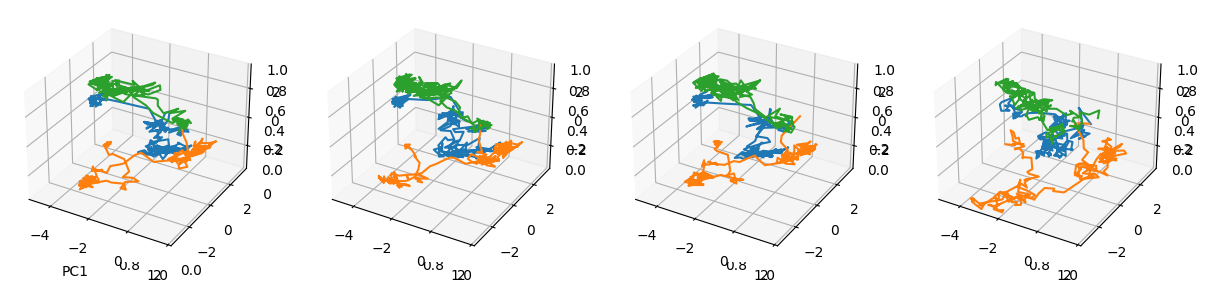

In [17]:
fig = plt.figure(figsize=(15, 5))
axes = fig.subplots(1, 4, sharex=True, sharey=True,  subplot_kw={'projection': '3d'})
ax1 = fig.add_subplot(1,4,1, projection='3d')
ax2 = fig.add_subplot(1,4,2, projection='3d')
ax3 = fig.add_subplot(1,4,3, projection='3d')
ax4 = fig.add_subplot(1,4,4, projection='3d')

for i in range(3):
    ax1.plot(true_plot[i][:,0], true_plot[i][:,1], true_plot[i][:,2])
    ax2.plot(lfads_plot[i][:,0], lfads_plot[i][:,1], lfads_plot[i][:,2])
    ax3.plot(gru_plot[i][:,0], gru_plot[i][:,1], gru_plot[i][:,2])
    ax4.plot(lds_plot[i][:,0], lds_plot[i][:,1], lds_plot[i][:,2])

ax1.set_xlabel("PC1")
ax1.set_xlim([-5, 2])
ax2.set_xlim([-5, 2])
ax3.set_xlim([-5, 2])
ax4.set_xlim([-5, 2])
ax1.set_ylim([-3.5, 3.5])
ax2.set_ylim([-3.5, 3.5])
ax3.set_ylim([-3.5, 3.5])
ax4.set_ylim([-3.5, 3.5])
ax1.set_zlim([-3.5, 3.5])
ax2.set_zlim([-3.5, 3.5])
ax3.set_zlim([-3.5, 3.5])
ax4.set_zlim([-3.5, 3.5])


plt.savefig("MT.pdf")


In [18]:
comparison_RT = Comparison(comparison_tag="RandomTarget")
comparison_RT.load_analysis(an_TT_RT, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU_RT:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DD.create(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison_RT.load_analysis(analysis_GRU, group = "GRU")

for subfolder in subfolders_LFADS_RT:
    subfolder = subfolder + "/"
    analysis_LFADS = Analysis_DD.create(run_name = "LFADS", filepath = subfolder, model_type = "LFADS")
    comparison_RT.load_analysis(analysis_LFADS, group = "LFADS")

for subfolder in subfolders_LDS_RT:
    subfolder = subfolder + "/"
    analysis_LDS = Analysis_DD.create(run_name = "LDS", filepath = subfolder, model_type = "SAE")
    comparison_RT.load_analysis(analysis_LDS, group = "LDS")


comparison_RT.regroup()

In [19]:
comparison_RT_single = Comparison(comparison_tag="RT_single")
comparison_RT_single.load_analysis(an_TT_RT, reference_analysis=True, group = "TT")
comparison_RT_single.load_analysis(analysis_LFADS, group = "LFADS")
comparison_RT_single.load_analysis(analysis_GRU, group = "GRU")
comparison_RT_single.load_analysis(analysis_LDS, group = "LDS")


In [20]:

def plot_radial_histogram(data, bins=30):
    """
    Plots a radial histogram.

    Parameters:
    data (array-like): The data to plot.
    bins (int): The number of bins in the histogram.

    Returns:
    None
    """
    # Compute the histogram
    hist, bin_edges = np.histogram(data, bins=bins)

    # Compute the width of each bin
    widths = np.diff(bin_edges)

    # Compute the angles for each bin
    theta = bin_edges[:-1] * 2 * np.pi / bin_edges[-1]

    # Create the plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    # Plot the histogram
    bars = ax.bar(theta, hist, width=widths, bottom=0.0, align='edge')

    # Add some color to the bars
    for bar in bars:
        bar.set_facecolor(plt.cm.viridis(bar.get_height() / max(hist)))
        bar.set_alpha(0.7)

    plt.show()

[4 5 1 1 6 5 5 6 2 4 1 1 5 2 1 2 2 1 8 1 1 6 5 5 2 1 6 4 1 1 8 5 5 5 5 6 1
 1 1 8 6 5 2 1 3 8 7 6 5 5 1 4 4 6 3 2 6 4 1 1 6 1 5 6 7 4 2 1 1 6 2 1 3 5
 5 2 1 2 3 6 3 5 7 2 8 7 5 2 1 5 2 1 8 6 5 1 3 5 6 1 8 8 3 1 1 2 6 5 1 6 1
 1 8 8 5 1 5 6 2 6 1 3 1 8 5 6 2 2 1 2 5 1 1 5 2 5 5 5 8 2 4 5 6 4 5 1 7 6
 8 1 5 5 4 2 1 5 6 5 5 8 5 5 6 2 1 8 7 1 6 5 4 1 1 1 1 2 1 2 6 4 5 5 3 4 6
 1 1 3 5 4 2 8 5 8 1 8 5 8 5 5]


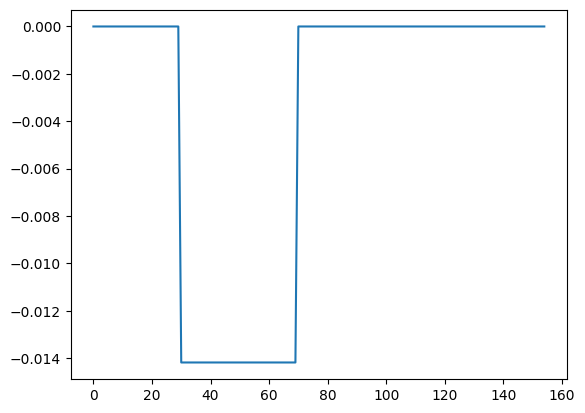

In [21]:
#comparison_RT_single.plot_trials_3d_reference(num_trials=3, savePDF=True)
lats_true = an_TT_RT.get_latents(phase= "val")
lats_lfads = analysis_LFADS.get_latents(phase= "val")
lats_gru = analysis_GRU.get_latents(phase ="val")
lats_lds = analysis_LDS.get_latents(phase = "val")

endpoint_pos = an_TT_RT.get_model_outputs(phase= "val")['controlled'].detach().numpy()
inputs_true = an_TT_RT.get_true_inputs(phase= "val")
env_inputs = an_TT_RT.get_model_inputs_noiseless(phase= "val")
start_pos = endpoint_pos[:,0,:]
targ_pos = inputs_true[:,40,:2]
reach_ang = np.arctan2(targ_pos[:,1]-start_pos[:,1], targ_pos[:,0]-start_pos[:,0])

n_bins = 8
# plt.hist(reach_ang, bins=n_bins)
plt.plot(inputs_true[0,:,0])
# Bin trials by reach angle
bins = np.linspace(-np.pi, np.pi, n_bins+1)
reach_ang_bins = np.digitize(reach_ang, bins)
print(reach_ang_bins)

reach_start = 60
reach_end = 100

lats_true = lats_true.detach().numpy()
lats_true = lats_true[:,reach_start:reach_end,:]
lats_lfads = lats_lfads.detach().numpy()
lats_lfads = lats_lfads[:,reach_start:reach_end,:]
lats_gru = lats_gru.detach().numpy()
lats_gru = lats_gru[:,reach_start:reach_end,:]
lats_lds = lats_lds.detach().numpy()
lats_lds = lats_lds[:,reach_start:reach_end,:]

lats_true_flat = lats_true.reshape(-1, lats_true.shape[-1])
lats_pca = PCA(n_components=3)
lats_pca.fit(lats_true_flat)
lats_true_pca_flat = lats_pca.transform(lats_true_flat)
lats_true_pca = lats_true_pca_flat.reshape(lats_true.shape[0], lats_true.shape[1], -1)

lats_lfads_flat = lats_lfads.reshape(-1, lats_lfads.shape[-1])
lr_lfads = LinearRegression()
lr_lfads.fit(lats_lfads_flat, lats_true_pca_flat)
lats_lfads_to_true = lr_lfads.predict(lats_lfads_flat)
lats_lfads_to_true = lats_lfads_to_true.reshape(lats_lfads.shape[0], lats_lfads.shape[1], -1)

lats_gru_flat = lats_gru.reshape(-1, lats_gru.shape[-1])
lr_gru = LinearRegression()
lr_gru.fit(lats_gru_flat, lats_true_pca_flat)
lats_gru_to_true = lr_gru.predict(lats_gru_flat)
lats_gru_to_true = lats_gru_to_true.reshape(lats_gru.shape[0], lats_gru.shape[1], -1)

lats_lds_flat = lats_lds.reshape(-1, lats_lds.shape[-1])
lr_lds = LinearRegression()
lr_lds.fit(lats_lds_flat, lats_true_pca_flat)
lats_lds_to_true = lr_lds.predict(lats_lds_flat)
lats_lds_to_true = lats_lds_to_true.reshape(lats_lds.shape[0], lats_lds.shape[1], -1)

In [22]:
print(n_bins)
print(reach_ang_bins)

# Make a list of lists. The top level is the reach angle bin, and the second level are the trials that have that reach angle
trial_list = [[] for _ in range(n_bins)]
for i in range(len(reach_ang_bins)):
    trial_list[reach_ang_bins[i] - 1].append(i)


8
[4 5 1 1 6 5 5 6 2 4 1 1 5 2 1 2 2 1 8 1 1 6 5 5 2 1 6 4 1 1 8 5 5 5 5 6 1
 1 1 8 6 5 2 1 3 8 7 6 5 5 1 4 4 6 3 2 6 4 1 1 6 1 5 6 7 4 2 1 1 6 2 1 3 5
 5 2 1 2 3 6 3 5 7 2 8 7 5 2 1 5 2 1 8 6 5 1 3 5 6 1 8 8 3 1 1 2 6 5 1 6 1
 1 8 8 5 1 5 6 2 6 1 3 1 8 5 6 2 2 1 2 5 1 1 5 2 5 5 5 8 2 4 5 6 4 5 1 7 6
 8 1 5 5 4 2 1 5 6 5 5 8 5 5 6 2 1 8 7 1 6 5 4 1 1 1 1 2 1 2 6 4 5 5 3 4 6
 1 1 3 5 4 2 8 5 8 1 8 5 8 5 5]


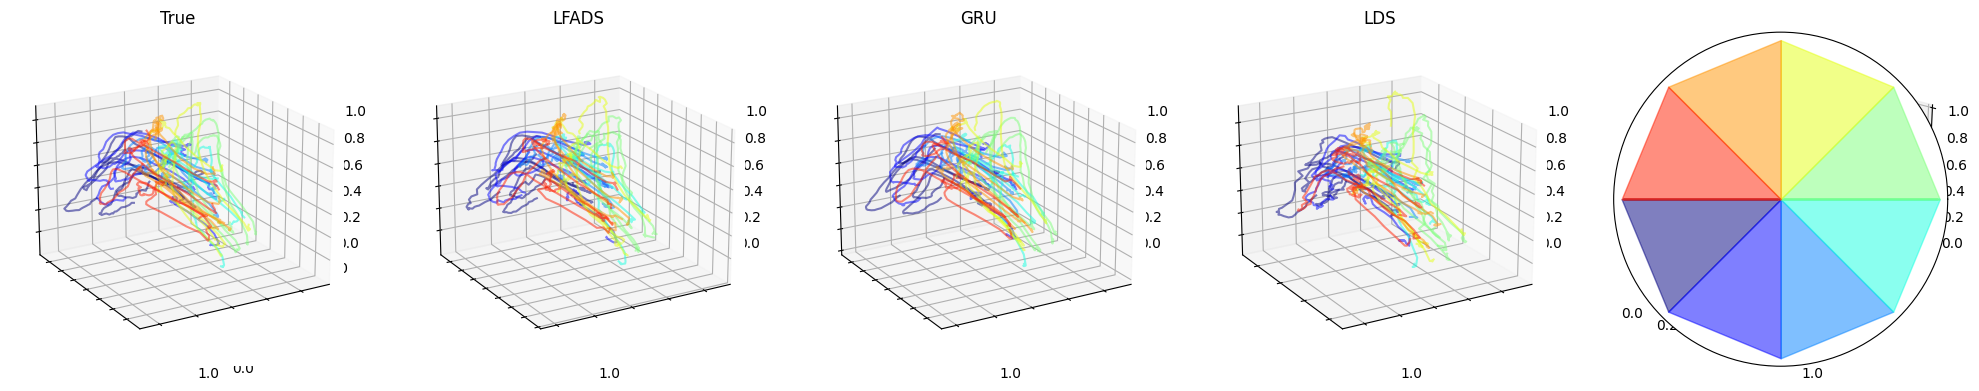

In [23]:

# Plot latents colored by reach angle bin
fig = plt.figure(figsize=(25, 10))
axes = fig.subplots(1, 5, sharex=True, sharey=True,  subplot_kw={'projection': '3d'})
ax1 = fig.add_subplot(1,5,1, projection='3d')
ax2 = fig.add_subplot(1,5,2, projection='3d')
ax3 = fig.add_subplot(1,5,3, projection='3d')
ax4 = fig.add_subplot(1,5,4, projection='3d')
ax5 = fig.add_subplot(1,5,5, projection='polar')


n_trials =5
plotted_trial_ang = []
for i in range(n_bins):
    color = plt.cm.jet(i / n_bins)
    for j in range(n_trials):
        trial = trial_list[i][j]
        plotted_trial_ang.append((reach_ang[trial], i))
        ax1.plot(lats_true_pca[trial][:,0], lats_true_pca[trial][:,1], lats_true_pca[trial][:,2], color=color, alpha=0.5)
        ax2.plot(lats_lfads_to_true[trial][:,0], lats_lfads_to_true[trial][:,1], lats_lfads_to_true[trial][:,2], color=color, alpha = 0.5)
        ax3.plot(lats_gru_to_true[trial][:,0], lats_gru_to_true[trial][:,1], lats_gru_to_true[trial][:,2], color=color, alpha = 0.5)
        ax4.plot(lats_lds_to_true[trial][:,0], lats_lds_to_true[trial][:,1], lats_lds_to_true[trial][:,2], color=color, alpha = 0.5)

ax1.set_title("True")
ax2.set_title("LFADS")
ax3.set_title("GRU")
ax4.set_title("LDS")

ax1.view_init(20, 60)
ax2.view_init(20, 60)
ax3.view_init(20, 60)
ax4.view_init(20, 60)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_zticklabels([])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_zticklabels([])
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.set_zticklabels([])

# for ang, num in plotted_trial_ang:
#     ax5.plot([ang, ang], [0, 1], color=plt.cm.jet(num / n_bins))

for bin_num in range(n_bins):
    # Make surface plot of the angles on the unit circle
    ax5.fill_between([bins[bin_num], bins[bin_num+1]], [0, 0], [1, 1], color=plt.cm.jet(bin_num / n_bins), alpha=0.5)
ax5.set_rticks([])
ax5.set_xticks([])
plt.savefig("RT_radial.pdf")

In [24]:
print("3BFF")
metrics_3BFF = comparison_3BFF.compute_metrics(metric_list = ["rate_r2", "state_r2", "co-bps", "cycle_con"])

print("MT")
metrics_MT = comparison_MT.compute_metrics(metric_list = ["rate_r2", "state_r2", "co-bps", "cycle_con"])

print("RT")
metrics_RT = comparison_RT.compute_metrics(metric_list = ["rate_r2", "state_r2", "co-bps", "cycle_con"])

3BFF

Working on 1 of 4: GRU
Rate R2: 0.9689461588859558
State R2: 0.961792528629303
CO-BPS: 0.1357797086238861
Cycle Consistency R2: 0.9181381464004517

Working on 2 of 4: LDS
Rate R2: 0.24366581439971924
State R2: 0.48816338181495667
CO-BPS: 0.03532413765788078
Cycle Consistency R2: 0.7224243879318237

Working on 3 of 4: LFADS
Rate R2: 0.9301701784133911
State R2: 0.8808197379112244
CO-BPS: 0.12919266521930695
Cycle Consistency R2: 0.7209892868995667

Working on 4 of 4: TT_3BFF
MT

Working on 1 of 4: GRU
Rate R2: 0.9264480471611023
State R2: 0.8650912642478943
CO-BPS: 0.14684413373470306
Cycle Consistency R2: 0.591224193572998

Working on 2 of 4: LDS
Rate R2: 0.5521055459976196
State R2: 0.6759597659111023
CO-BPS: 0.0940060168504715
Cycle Consistency R2: 0.0603485032916069

Working on 3 of 4: LFADS


KeyboardInterrupt: 